In [1]:
%load_ext autoreload
%autoreload 2

import cPickle as pickle
import os; import sys; sys.path.append('..')
import gp
import gp.nets as nets

from nolearn.lasagne.visualize import plot_loss
from nolearn.lasagne.visualize import plot_conv_weights
from nolearn.lasagne.visualize import plot_conv_activity
from nolearn.lasagne.visualize import plot_occlusion

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, CuDNN 4007)
/home/d/nolearn/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [2]:
PATCH_PATH = ('cylinder2_rgba_small')

In [3]:
X_train, y_train, X_test, y_test = gp.Patch.load_rgba(PATCH_PATH)

Loaded /home/d/patches//cylinder2_rgba_small/ in 0.152738809586 seconds.


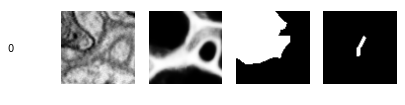

In [4]:
gp.Util.view_rgba(X_train[100], y_train[100])

In [7]:
cnn = nets.RGBANetPlusPlus()

CNN configuration: 
    Our CNN with image, prob, merged_array and border overlap as RGBA.

    This includes dropout. This also includes more layers. And more filters.
    


In [ ]:
cnn = cnn.fit(X_train, y_train)

# Neural Network with 479650 learnable parameters

## Layer information

  #  name      size
---  --------  ---------
  0  input     4x75x75
  1  conv1     128x73x73
  2  pool1     128x36x36
  3  dropout1  128x36x36
  4  conv2     96x34x34
  5  pool2     96x17x17
  6  dropout2  96x17x17
  7  conv3     96x15x15
  8  pool3     96x7x7
  9  dropout3  96x7x7
 10  conv4     96x5x5
 11  pool4     96x2x2
 12  dropout4  96x2x2
 13  hidden5   512
 14  dropout5  512
 15  output    2



In [ ]:
test_accuracy = cnn.score(X_test, y_test)

In [ ]:
test_accuracy

In [ ]:
plot_loss(cnn)

In [ ]:
# store CNN
sys.setrecursionlimit(1000000000)
with open(os.path.expanduser('~/Projects/gp/nets/RGBAPlusPlus.p'), 'wb') as f:
  pickle.dump(cnn, f, -1)